
## İLERİ SEVİYE MÜŞTERİ SEGMENTASYONU PROJESİ

In [1]:
!pip install kmodes
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from kmodes.kprototypes import KPrototypes  
from kmodes.kmodes import KModes

In [2]:
df = pd.read_csv("segmentation_data.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
df_temp = df[['ID','Age', 'Income']]
df_temp

,ID,Age,Income
0,100000001,67,124670
1,100000002,22,150773
2,100000003,49,89210
3,100000004,45,171565
4,100000005,53,149031
...,...,...,...
1995,100001996,47,123525
1996,100001997,27,117744
1997,100001998,31,86400
1998,100001999,24,97968


In [6]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [7]:
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [8]:
df = df.drop(['ID'], axis=1)

In [9]:
mark_array= df.values

mark_array[:, 2] = mark_array[:, 2].astype(float)
mark_array[:, 4] = mark_array[:, 4].astype(float)

In [10]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1


In [11]:
kproto = KPrototypes(n_clusters=10, verbose=2, max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 1, 3, 5, 6])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 834, ncost: 192.2447766009146
Run: 1, iteration: 2/20, moves: 280, ncost: 177.3236319298352
Run: 1, iteration: 3/20, moves: 196, ncost: 175.4926456549193
Run: 1, iteration: 4/20, moves: 49, ncost: 175.32136269892928
Run: 1, iteration: 5/20, moves: 11, ncost: 175.3119091053071
Run: 1, iteration: 6/20, moves: 1, ncost: 175.31112883710713
Run: 1, iteration: 7/20, moves: 0, ncost: 175.31112883710713
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 750, ncost: 185.2371103433768
Run: 2, iteration: 2/20, moves: 263, ncost: 175.93555328047404
Run: 2, iteration: 3/20, moves: 91, ncost: 172.48486872166296
Run: 2, iteration: 4/20, moves: 65, ncost: 171.87519157462813
Run: 2, iteration: 5/20, moves: 28, ncost: 171.78548302727896
Run: 2, iteration: 6/20, moves: 6, ncost: 171.78215934808455
Run: 2, iteration: 7/20, moves: 3, nc

In [12]:
print(kproto.cluster_centroids_)

[[0.44091551 0.31319147 0.         0.         1.         1.
  0.        ]
 [0.21281718 0.18967911 1.         1.         1.         0.
  0.        ]
 [0.15834702 0.28331258 1.         1.         1.         1.
  0.        ]
 [0.36395843 0.53763517 0.         0.         1.         2.
  2.        ]
 [0.30402299 0.18723239 1.         0.         1.         0.
  0.        ]
 [0.15757121 0.26805958 0.         0.         0.         1.
  0.        ]
 [0.61994542 0.46256745 1.         1.         2.         1.
  1.        ]
 [0.75123153 0.32959075 0.         0.         2.         0.
  0.        ]
 [0.33908046 0.35308039 0.         0.         1.         1.
  1.        ]
 [0.18956443 0.34364662 1.         1.         1.         1.
  2.        ]]


In [13]:
len(kproto.cluster_centroids_)

10

In [14]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [15]:
df['cluster']=cluster_dict

In [16]:
df[['ID','Age', 'Income']] = df_temp

In [17]:
len(df[df['cluster']== 0])

171

In [18]:
df[df['cluster']== 0].head(10)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
2,0,0,49,1,89210,0,0,0,100000003
5,0,0,35,1,144848,0,0,0,100000006
16,0,0,53,1,125550,1,0,0,100000017
22,0,0,48,1,89804,0,0,0,100000023
23,0,0,44,1,134918,1,2,0,100000024
42,0,0,44,1,133658,0,0,0,100000043
46,0,0,39,1,140182,1,0,0,100000047
48,0,0,39,1,130500,0,0,0,100000049
71,0,0,46,1,73703,0,0,0,100000072
77,0,0,51,1,155486,1,2,0,100000078


In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==6]
df7 = df[df.cluster==7]
df8 = df[df.cluster==8]
df9 = df[df.cluster==9]
df10 = df[df.cluster==10]

No handles with labels found to put in legend.


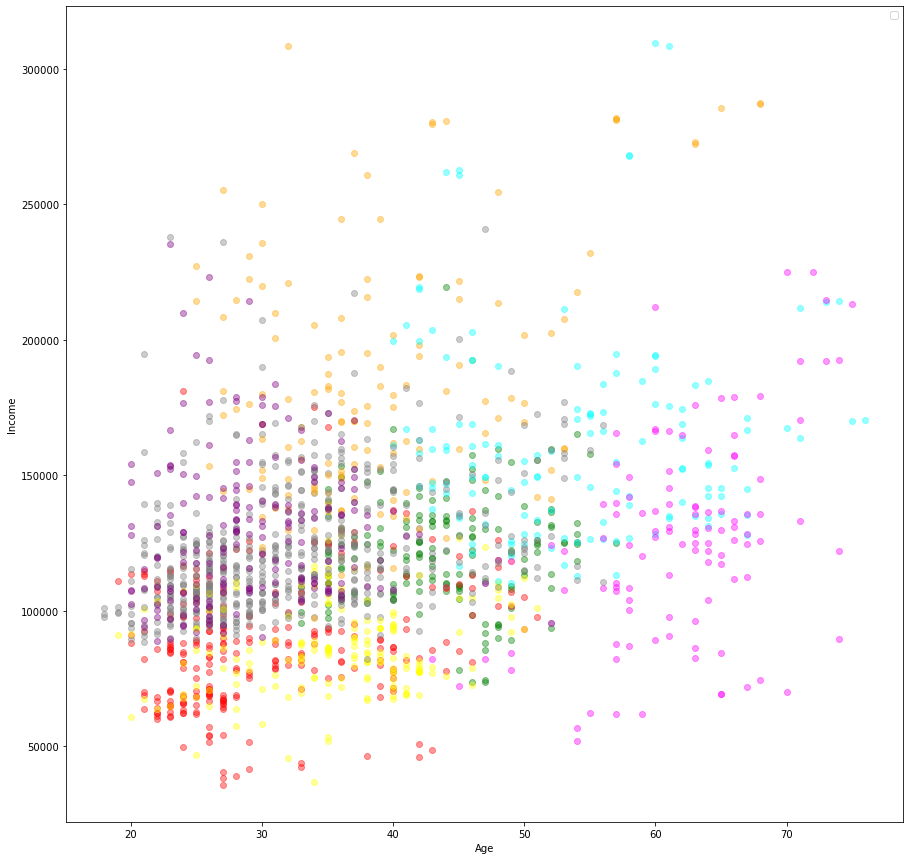

In [20]:
plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

plt.scatter(df1.Age, df1['Income'],color='green', alpha = 0.4)
plt.scatter(df2.Age, df2['Income'],color='red', alpha = 0.4)
plt.scatter(df3.Age, df3['Income'],color='gray', alpha = 0.4)
plt.scatter(df4.Age, df4['Income'],color='orange', alpha = 0.4)
plt.scatter(df5.Age, df5['Income'],color='yellow', alpha = 0.4)
plt.scatter(df6.Age, df6['Income'],color='cyan', alpha = 0.4)
plt.scatter(df7.Age, df7['Income'],color='magenta', alpha = 0.4)
plt.scatter(df8.Age, df8['Income'],color='gray', alpha = 0.4)
plt.scatter(df9.Age, df9['Income'],color='purple', alpha = 0.4)
plt.scatter(df10.Age, df10['Income'],color='blue', alpha = 0.4)
plt.legend()
plt.show()